# About

The goal of actual project is to test the implementation of a small code to use the available data on https://sites.research.google/gr/open-buildings/ in order to process Buenos Aires city data and create some representation of the characteristics of the buildings polygons on the map. On this notebook we will explore the available data in order to understand the data format and the information contained in it.



In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
import seaborn as sns

In [18]:
# We build a small example to avoid loading the entire dataset for testing purposes. 
data_folder = "Data/"
selected_file = "95b_buildings.csv"
selected_subset_file = "95b_buildings_head.csv"
data = pd.read_csv(data_folder + selected_file)
data.head(1000).to_csv(data_folder + selected_subset_file, index=False)


In [19]:
geo_data = gpd.read_file(data_folder + selected_subset_file)
geo_data['geometry'] = geo_data['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(geo_data, geometry='geometry')
gdf.head()

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code
0,-32.48321736,-60.85385895,16.9383,0.6968,"POLYGON ((-60.85388 -32.4832, -60.85389 -32.48...",47VXG48W+PF68
1,-34.78632941,-58.85727836,38.3722,0.7567,"POLYGON ((-58.85723 -34.78633, -58.85729 -34.7...",48Q3647V+F39R
2,-34.50377706,-58.7277845,16.2033,0.7241,"POLYGON ((-58.72778 -34.50375, -58.72781 -34.5...",48Q3F7WC+FVPX
3,-34.69288394,-58.59202251,44.2265,0.6755,"POLYGON ((-58.59205 -34.69293, -58.59204 -34.6...",48Q38C45+R5XM
4,-34.3908417,-58.69393638,34.2836,0.7604,"POLYGON ((-58.6939 -34.39082, -58.69396 -34.39...",48Q3J854+MC86


All columns look like standardized names, full_plus_code is a Google code to identify the location of the building that we will not use.

In [20]:
gdf.dtypes # We need to covert the data to the correct types

latitude            object
longitude           object
area_in_meters      object
confidence          object
geometry          geometry
full_plus_code      object
dtype: object

In [21]:
gdf["latitude"] = gdf["latitude"].astype(float)
gdf["area_in_meters"] = gdf["area_in_meters"].astype(float)
gdf["confidence"] = gdf["confidence"].astype(float)

<Axes: >

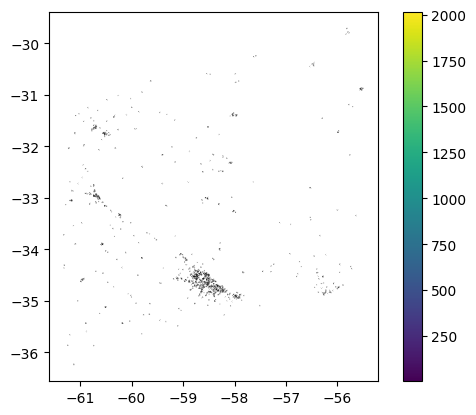

In [22]:
gdf.plot(column='area_in_meters', cmap='viridis', edgecolor='black', legend=True)

In [23]:
N = 1

In [24]:
selected = gdf.loc[[N]]
selected

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code
1,-34.786329,-58.85727836,38.3722,0.7567,"POLYGON ((-58.85723 -34.78633, -58.85729 -34.7...",48Q3647V+F39R


<Axes: >

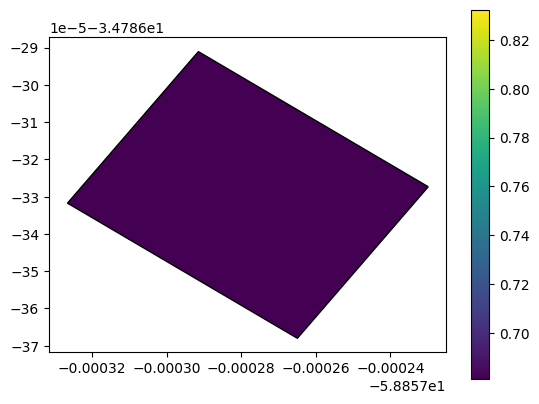

In [25]:
selected.plot(column='confidence', cmap='viridis', edgecolor='black', legend=True)

In [26]:
selected["geometry"].values[0].bounds

(-58.8573267443956, -34.7863678552193, -58.8572299776395, -34.7862909600092)

In [27]:
selected["geometry"].values[0].bounds[2] - selected["geometry"].values[0].bounds[0] # width

9.676675610137409e-05

In [28]:
(selected["geometry"].values[0].bounds[2] - selected["geometry"].values[0].bounds[0]) * 111320 # width in m

10.772075289204963

In [29]:
(selected["geometry"].values[0].bounds[3] - selected["geometry"].values[0].bounds[1]) * 111320 # height in m

8.559974788308864

We could see that the buildings size is on the order of 10 meters that is the required definition of the outputs (11320 is approx the distance over a sphere of Earth radius of 1 degree).

We will check the statistical size of the buildings (really is not the buildings, is the bounds of the polygon oriented on long and lat that contains the geometry)

In [30]:
longs_size = []
lats_size = []
for i in range(1000):
    long_size = (gdf.loc[[i]]["geometry"].values[0].bounds[2] - gdf.loc[[i]]["geometry"].values[0].bounds[0]) * 111320
    lat_size = (gdf.loc[[i]]["geometry"].values[0].bounds[3] - gdf.loc[[i]]["geometry"].values[0].bounds[1]) * 111320
    longs_size.append(long_size)
    lats_size.append(lat_size)
    

<Axes: ylabel='Count'>

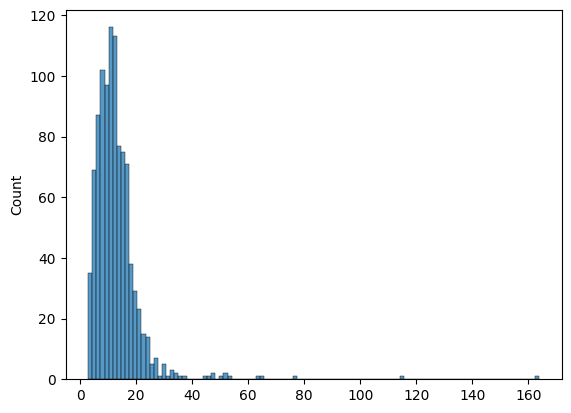

In [31]:
sns.histplot(longs_size)

<Axes: ylabel='Count'>

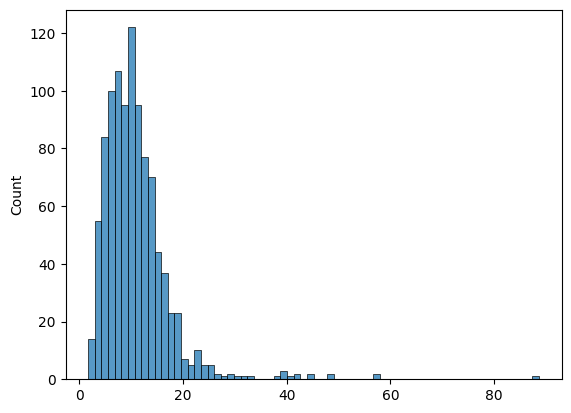

In [32]:
sns.histplot(lats_size)